## Preprocessing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

dataset = pd.read_csv('../data/Clean_Dataset.csv')
dataset.drop(columns=['Unnamed: 0'], inplace=True) 

# feature selection and dropping price column
unincluded_features = [ 'price']

X = dataset.drop(unincluded_features, axis = 1)
y = dataset['price']


categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = numerical_features = [col for col in X.columns if col not in categorical_features and col != 'price']

for col in categorical_features:
    X[col] = X[col].astype('category')

le = LabelEncoder()
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

standScaler = StandardScaler()
minMaxScaler = MinMaxScaler(feature_range=(0,1))

X_train_mmscaler = minMaxScaler.fit_transform(X_train)
X_test_mmscaler = minMaxScaler.fit_transform(X_test)

X_train_stscaler = standScaler.fit_transform(X_train)
X_test_stscaler = standScaler.transform(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def KNN(X_train, X_test, y_train, y_test, verbose=False):
    results = []
    for k in range(1, 31, 2):
        if verbose:
            print(f"Started for k={k}")
        modelKNN = KNeighborsRegressor(n_neighbors=k)
        modelKNN.fit(X_train, y_train)
        
        y_pred = modelKNN.predict(X_test)
     
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = root_mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    
        results.append({'k': k, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
        
    if verbose:
        print(f"Done for k={k}", {'k': k, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
    results_df = pd.DataFrame(results).set_index('k')
    return results_df

In [19]:
results_df_stscaler = KNN(X_train_stscaler, X_test_stscaler, y_train, y_test)

In [20]:
results_df_mm = KNN(X_train_mmscaler, X_test_mmscaler, y_train, y_test)

In [12]:
def plot_KNN(results_df):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
    axes = axes.flatten()  
    
    # Plot MAE
    axes[0].plot(results_df.index, results_df['MAE'], marker='o', color='b')
    axes[0].set_title('Mean Absolute Error (MAE)')
    axes[0].set_xlabel('k')
    axes[0].set_ylabel('MAE')
    
    # Plot MSE
    axes[1].plot(results_df.index, results_df['MSE'], marker='o', color='r')
    axes[1].set_title('Mean Squared Error (MSE)')
    axes[1].set_xlabel('k')
    axes[1].set_ylabel('MSE')
    
    # Plot RMSE
    axes[2].plot(results_df.index, results_df['RMSE'], marker='o', color='g')
    axes[2].set_title('Root Mean Squared Error (RMSE)')
    axes[2].set_xlabel('k')
    axes[2].set_ylabel('RMSE')
    
    # Plot R2
    axes[3].plot(results_df.index, results_df['R2'], marker='o', color='purple')
    axes[3].set_title('R-squared (R2)')
    axes[3].set_xlabel('k')
    axes[3].set_ylabel('R2')
    
    plt.tight_layout()
    plt.show()

In [23]:
results_df_mm

,MAE,MSE,RMSE,R2
k,,,,
1,1845.135053,2.198168e+07,4688.462499,0.957424
3,1800.203263,1.548718e+07,3935.375975,0.970003
5,1874.725853,1.503632e+07,3877.669483,0.970876
7,1938.698659,1.518684e+07,3897.030120,0.970585
9,1989.087917,1.536053e+07,3919.251244,0.970249
11,2036.630174,1.558333e+07,3947.573259,0.969817
13,2085.405979,1.585407e+07,3981.716449,0.969293
15,2131.178308,1.610935e+07,4013.645592,0.968798
17,2172.629231,1.633582e+07,4041.759686,0.968360


Best results are achieved for k = 15

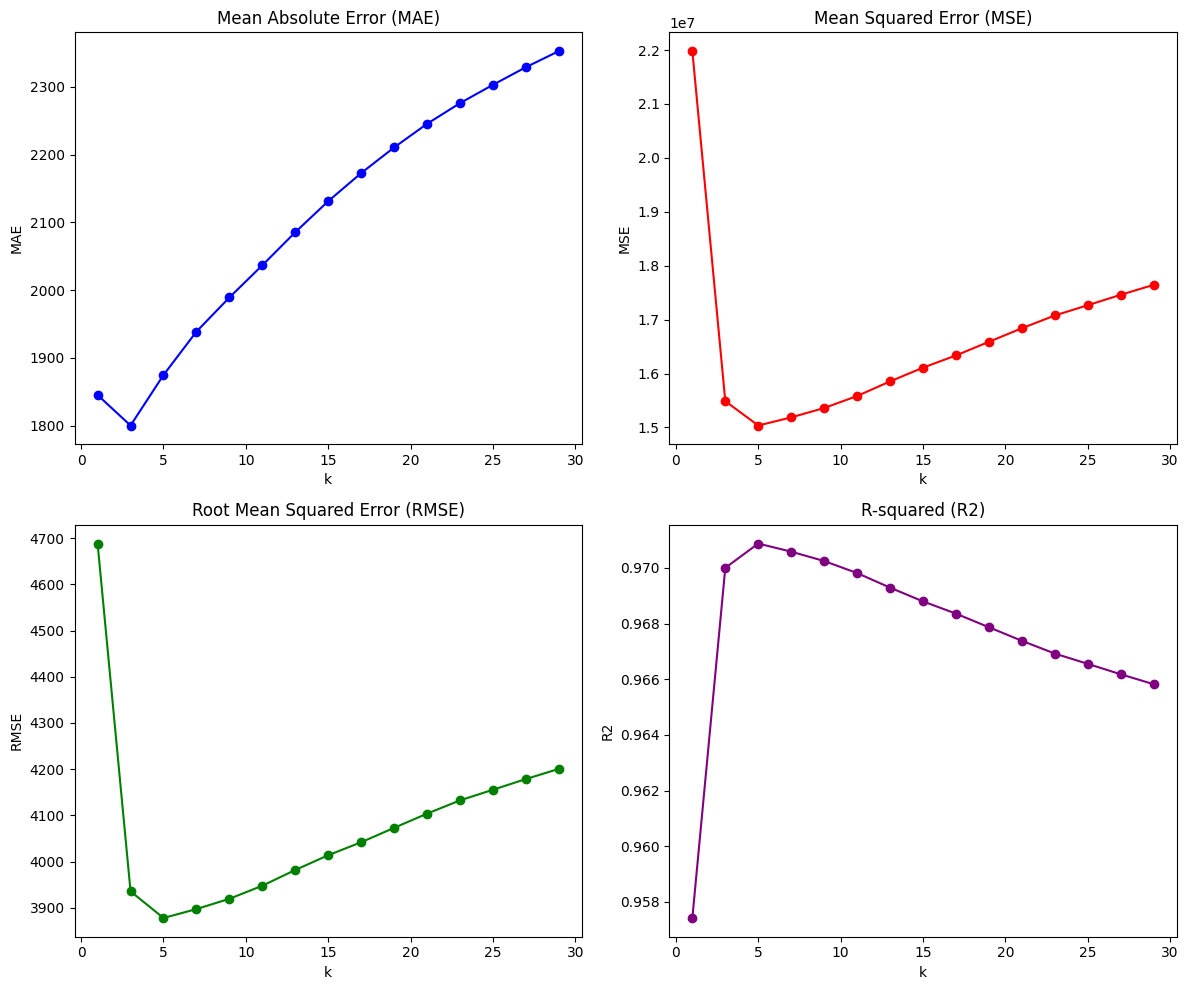

In [24]:
plot_KNN(results_df_mm)

In [26]:
results_df_stscaler

,MAE,MSE,RMSE,R2
k,,,,
1,1577.955689,1.797067e+07,4239.183113,0.965193
3,1638.674333,1.311940e+07,3622.070676,0.974589
5,1774.964336,1.366578e+07,3696.725823,0.973531
7,1866.884418,1.412516e+07,3758.345459,0.972641
9,1939.689332,1.453905e+07,3813.011239,0.971840
11,2008.251343,1.496944e+07,3869.036620,0.971006
13,2068.660920,1.536127e+07,3919.345580,0.970247
15,2121.749446,1.574212e+07,3967.634081,0.969509
17,2165.448611,1.603882e+07,4004.849183,0.968935


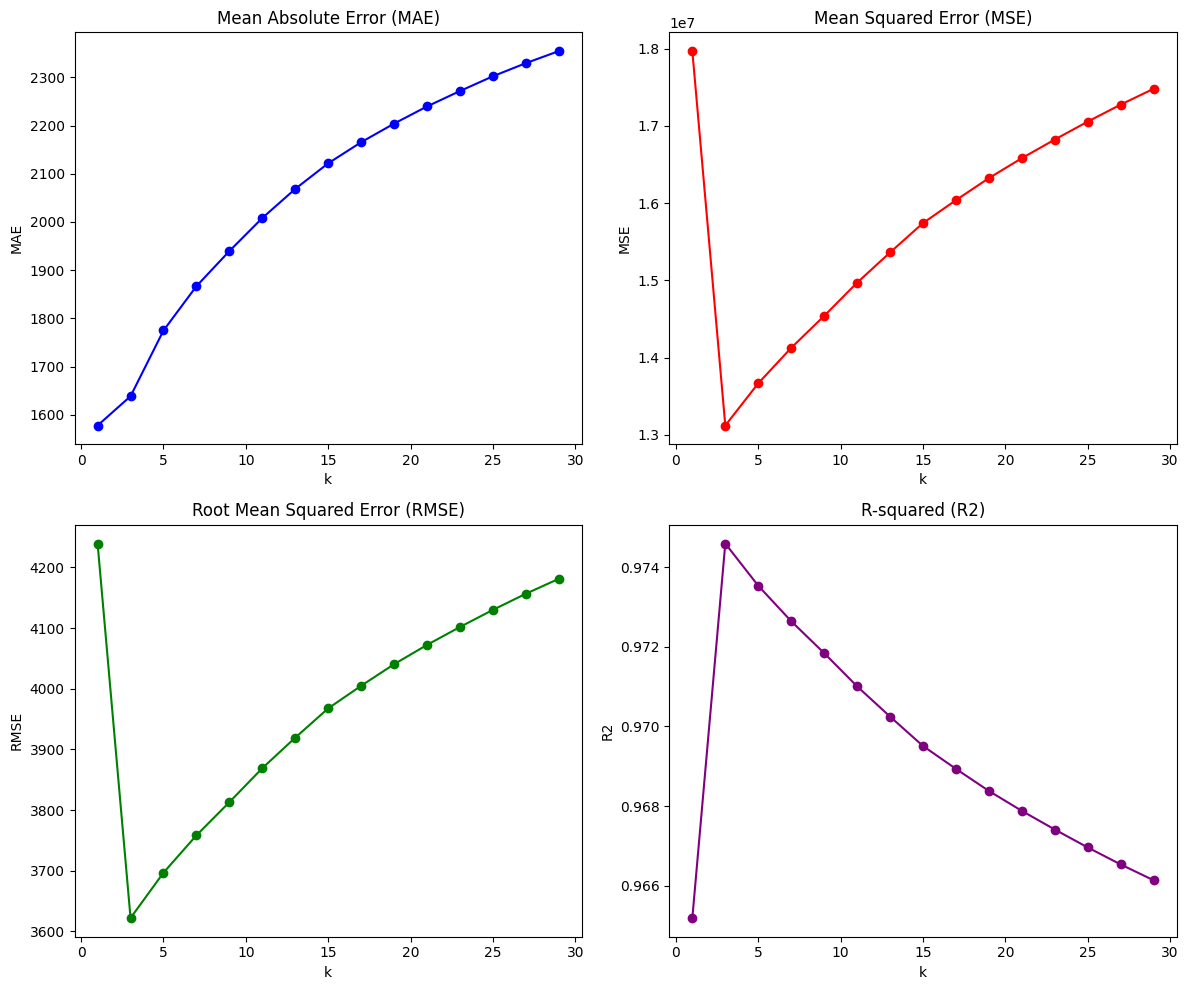

In [25]:
plot_KNN(results_df_stscaler)

Best results in both cases are achieved when working with k = 3. K = 1 is sensitive to outliers and its MSE is significantly higher